## Execise 1 MLOps

In this exercise, do the following:
1. Create a function that preprocess new ames data in the same way as the original ames data was preprocessed in step 5 in the `MLOps.ipynb` notebook.
2. Create a function that takes as input a new ames dataset and a model. The function should pre-process the new data and evaluate the model on that new data using mean absolute error.
3. Test the function from 2. on the "NewAmesData1.csv" dataset and the best model from the `MLOps.ipynb` notebook.
4. Test the function from 2. on the "NewAmesData2.csv" dataset and the best model from the `MLOps.ipynb` notebook. Do you see any drift?
5. Do you see a data drift in "NewAmesData2.csv"? If so, for which variables?
6. Do you see a data drift in "NewAmesData4.csv"? If so, for which variables?

In [280]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
import pickle
from scipy.stats import ks_2samp, entropy


### 1. Create a function that preprocess new ames data in the same way as the original ames data was preprocessed in step 5 in the `MLOps.ipynb` notebook.

In [281]:
def preprocess_ames_data(df):
    df_processed = df.copy()
    
    # Create dummy variables for 'Bldg Type'
    bldg_dummies = pd.get_dummies(df_processed['Bldg Type'], drop_first=True, dtype='int', prefix='BType')
    df_processed = df_processed.join(bldg_dummies)
    
    # Create dummy variables for 'Neighborhood'
    nbh_dummies = pd.get_dummies(df_processed['Neighborhood'], drop_first=True, dtype='int', prefix='Nbh')
    df_processed = df_processed.join(nbh_dummies)
    
    # Drop the original categorical columns
    df_processed.drop(columns=['Bldg Type', 'Neighborhood'], inplace=True)
    
    return df_processed

### 2. Create a function that takes as input a new ames dataset and a model. The function should pre-process the new data and evaluate the model on that new data using mean absolute error.

In [282]:
def evaluate_model_on_new_data(new_data, model):

    # Preprocess the new data
    new_data_processed = preprocess_ames_data(new_data)
    
    # Separate features and target
    X_new = new_data_processed.drop(columns=["SalePrice"])
    y_new = new_data_processed["SalePrice"]
    
    # Make predictions and calculate MAE
    y_pred = model.predict(X_new)
    mae = mean_absolute_error(y_new, y_pred)
    
    return mae

### 3. Test the function from 2. on the "NewAmesData1.csv" dataset and the best model from the `MLOps.ipynb` notebook.

In [283]:
with open("model_rf_500.pkl", "rb") as f:
    model_final = pickle.load(f)

In [284]:
# Load the new Ames dataset
new_ames_data1 = pd.read_csv("NewAmesData1.csv")

# Evaluate the model on the new data
mae_new1 = evaluate_model_on_new_data(new_ames_data1, model_final)

print("Mean Absolute Error on NewAmesData1.csv:", mae_new1)

Mean Absolute Error on NewAmesData1.csv: 19358.33538293174


### 4. Test the function from 2. on the "NewAmesData2.csv" dataset and the best model from the `MLOps.ipynb` notebook. Do you see any drift?

In [285]:
# Load the new Ames dataset
new_ames_data2 = pd.read_csv("NewAmesData2.csv")

# Evaluate the model on the new data
mae_new2 = evaluate_model_on_new_data(new_ames_data2, model_final)

print("Mean Absolute Error on NewAmesData1.csv:", mae_new2)

Mean Absolute Error on NewAmesData1.csv: 122642.93781866827


we see drift, the MAE went from 
19358.33538293174 to 122642.93781866827
thats around a increase of 6 times. 

In [286]:
ks_2samp(new_ames_data1['SalePrice'], new_ames_data2['SalePrice'])

KstestResult(statistic=np.float64(0.6208277703604806), pvalue=np.float64(2.4920189035284662e-135), statistic_location=np.float64(78441.7083), statistic_sign=np.int8(-1))

### 5. Do you see a data drift in "NewAmesData2.csv"? If so, for which variables?

In [287]:
new_ames_data1.describe()

,Lot Area,Overall Cond,Year Built,Gr Liv Area,TotRms AbvGrd,Mo Sold,Yr Sold,SalePrice
count,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000
mean,10077.269693,5.058745,1971.823765,1481.263017,5.870494,6.325768,2007.736983,181129.140187
std,5431.422205,1.226607,32.027285,491.585274,1.693980,2.853957,1.346011,84355.480982
min,1471.000000,1.000000,1865.000000,409.000000,2.000000,1.000000,2006.000000,12796.000000
25%,7590.000000,4.000000,1951.000000,1113.000000,5.000000,4.000000,2007.000000,128708.000000
50%,9421.000000,5.000000,1975.000000,1442.000000,6.000000,6.000000,2008.000000,159453.000000
75%,11599.000000,6.000000,1998.000000,1752.000000,7.000000,8.000000,2009.000000,211905.000000
max,70207.000000,9.000000,2022.000000,4669.000000,13.000000,12.000000,2010.000000,621346.000000


In [288]:
new_ames_data2.describe()

,Lot Area,Overall Cond,Year Built,Gr Liv Area,TotRms AbvGrd,Mo Sold,Yr Sold,SalePrice
count,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000,749.000000
mean,10077.269693,5.058745,1971.823765,1481.263017,5.870494,6.325768,2007.736983,115736.106582
std,5431.422205,1.226607,32.027285,491.585274,1.693980,2.853957,1.346011,161832.682309
min,1471.000000,1.000000,1865.000000,409.000000,2.000000,1.000000,2006.000000,-80248.699200
25%,7590.000000,4.000000,1951.000000,1113.000000,5.000000,4.000000,2007.000000,7215.642000
50%,9421.000000,5.000000,1975.000000,1442.000000,6.000000,6.000000,2008.000000,35803.908800
75%,11599.000000,6.000000,1998.000000,1752.000000,7.000000,8.000000,2009.000000,208342.899600
max,70207.000000,9.000000,2022.000000,4669.000000,13.000000,12.000000,2010.000000,681099.718200


so it looks like most of the numeric values are quite simmilar, the only changes is in TotRms AbvGrd and prince. but as we can see in price something strange is going on. negative salePrice ?.

In [289]:
new_ames_data2[new_ames_data2['SalePrice'] < 0]

,Lot Area,Overall Cond,Year Built,Gr Liv Area,TotRms AbvGrd,Mo Sold,Yr Sold,Bldg Type,Neighborhood,SalePrice
0,10738,6,1954,1457,5,8,2009,1Fam,NAmes,-9790.3818
4,14033,4,1992,1357,5,10,2009,1Fam,Mitchel,-57592.0466
17,10871,4,1948,1245,5,5,2008,1Fam,NAmes,-13582.5482
22,17581,4,1915,878,4,4,2006,1Fam,Sawyer,-79560.3207
29,12121,5,1977,1421,7,6,2008,1Fam,NWAmes,-37094.5932
...,...,...,...,...,...,...,...,...,...,...
730,10724,3,1971,1645,5,7,2008,1Fam,Sawyer,-10152.1452
736,13211,4,1938,1223,6,6,2007,1Fam,Crawfor,-49638.5279
738,10851,3,1930,709,4,8,2006,1Fam,NAmes,-5751.5686
741,13153,5,1956,1721,9,11,2008,Duplex,NAmes,-44992.0488


so drop or replace ?. the data seems to show the same houses in time, so we could replace the prices of the negative sales prices with the last know posetive prices. for now ill just drop them we are only talking about 132 rows. 

In [290]:
new_ames_data2_clean = new_ames_data2[new_ames_data2['SalePrice'] >= 0]

In [291]:
new_ames_data2_clean[new_ames_data2_clean['SalePrice'] < 0]

,Lot Area,Overall Cond,Year Built,Gr Liv Area,TotRms AbvGrd,Mo Sold,Yr Sold,Bldg Type,Neighborhood,SalePrice


In [292]:
new_ames_data2_clean.describe()

,Lot Area,Overall Cond,Year Built,Gr Liv Area,TotRms AbvGrd,Mo Sold,Yr Sold,SalePrice
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000
mean,9755.862237,5.082658,1974.179903,1515.218801,5.923825,6.364668,2007.753647,145032.787927
std,5900.405248,1.203879,32.610029,507.139670,1.696740,2.843011,1.359523,163871.250758
min,1471.000000,1.000000,1865.000000,409.000000,2.000000,1.000000,2006.000000,336.062000
25%,7170.000000,4.000000,1953.000000,1135.000000,5.000000,4.000000,2007.000000,22982.429200
50%,8809.000000,5.000000,1981.000000,1471.000000,6.000000,6.000000,2008.000000,52608.066300
75%,11165.000000,6.000000,2001.000000,1790.000000,7.000000,8.000000,2009.000000,297437.020000
max,70207.000000,9.000000,2022.000000,4669.000000,13.000000,12.000000,2010.000000,681099.718200


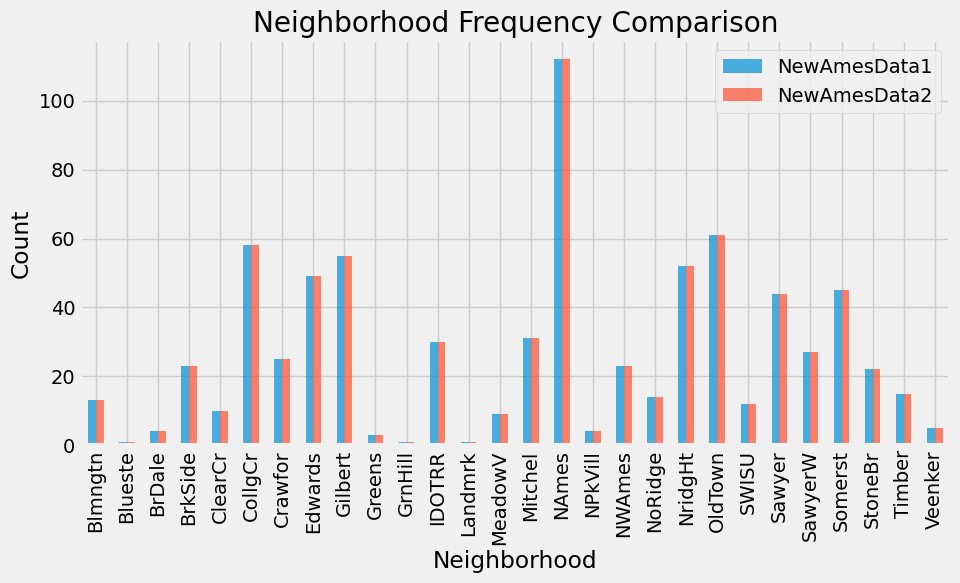

In [293]:
import matplotlib.pyplot as plt
import pandas as pd

# Count frequency of each category for a categorical column, e.g., 'Neighborhood'
counts1 = new_ames_data1['Neighborhood'].value_counts().sort_index()
counts2 = new_ames_data2['Neighborhood'].value_counts().sort_index()

# Combine the counts into one DataFrame for easier plotting
df_counts = pd.DataFrame({'NewAmesData1': counts1, 'NewAmesData2': counts2}).fillna(0)
df_counts = df_counts.sort_index()

df_counts.plot(kind='bar', figsize=(10, 5), alpha=0.7)
plt.title("Neighborhood Frequency Comparison")
plt.xlabel("Neighborhood")
plt.ylabel("Count")
plt.show()


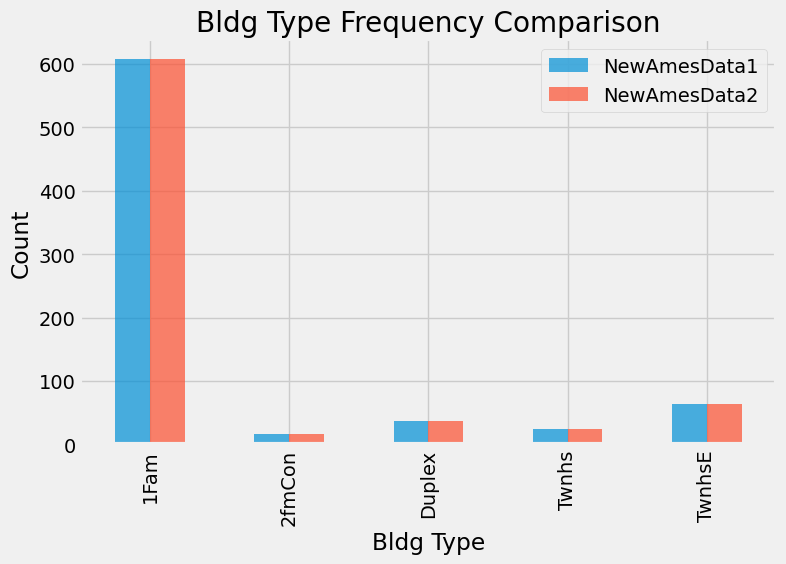

In [294]:
# Get value counts of Bldg Type in each dataset
bldg1_counts = new_ames_data1["Bldg Type"].value_counts().sort_index()
bldg2_counts = new_ames_data2["Bldg Type"].value_counts().sort_index()

# Create a DataFrame combining counts
bldg_df = pd.DataFrame({
    "NewAmesData1": bldg1_counts,
    "NewAmesData2": bldg2_counts
})

# Plot side-by-side
bldg_df.plot(kind="bar", figsize=(8, 5), alpha=0.7)
plt.title("Bldg Type Frequency Comparison")
plt.xlabel("Bldg Type")
plt.ylabel("Count")
plt.legend()
plt.show()

seems like the only real differinces is in price, so i might be outside things from the data set, that changes this, like inflation or or other things in the economi.

### 6. Do you see a data drift in "NewAmesData4.csv"? If so, for which variables?

In [295]:
new_ames_data4 = pd.read_csv("NewAmesData4.csv")
mae_new4 = evaluate_model_on_new_data(new_ames_data4, model_final)
print("Mean Absolute Error on NewAmesData4:", mae_new4)

Mean Absolute Error on NewAmesData4: 28680.950507010406


 NewAmesData1= 19358 - NewAmesData2 = 122642 - NewAmesData4 = 28680 
When compared to the original data, NewAmesData2 has experienced a severe drift.
NewAmesData4, while still different from the baseline, seems to have drifted less severely than NewAmesData2 — or perhaps the extreme anomalies (like negative sale prices) were cleaned up or weren't present.

In [296]:
print("NewAmesData1 Summary:")
print(new_ames_data1.describe())

print("\nNewAmesData2 Summary:")
print(new_ames_data2.describe())

print("\nNewAmesData4 Summary:")
print(new_ames_data4.describe())

NewAmesData1 Summary:
           Lot Area  Overall Cond   Year Built  Gr Liv Area  TotRms AbvGrd  \
count    749.000000    749.000000   749.000000   749.000000     749.000000   
mean   10077.269693      5.058745  1971.823765  1481.263017       5.870494   
std     5431.422205      1.226607    32.027285   491.585274       1.693980   
min     1471.000000      1.000000  1865.000000   409.000000       2.000000   
25%     7590.000000      4.000000  1951.000000  1113.000000       5.000000   
50%     9421.000000      5.000000  1975.000000  1442.000000       6.000000   
75%    11599.000000      6.000000  1998.000000  1752.000000       7.000000   
max    70207.000000      9.000000  2022.000000  4669.000000      13.000000   

          Mo Sold      Yr Sold      SalePrice  
count  749.000000   749.000000     749.000000  
mean     6.325768  2007.736983  181129.140187  
std      2.853957     1.346011   84355.480982  
min      1.000000  2006.000000   12796.000000  
25%      4.000000  2007.000000  128

Lot Area: The mean in Data4 (≈26,365) is more than double that in Data1/Data2 (≈10,077), suggesting that homes in Data4 tend to have larger lot sizes.

Overall Cond: The mean drops from around 5.06 (in Data1/Data2) to 4.03 in Data4, indicating a possible overall decline in property condition.

Yr Sold: Data4 spans a much broader range (from 1994 to 2022) compared to Data1/Data2 (2006–2010). This suggests that Data4 captures a longer period, which might reflect market changes over time (like inflation or shifts in buyer preferences).

Gr Liv Area & TotRms AbvGrd: These are relatively similar, though Data4 shows a slightly higher maximum for both, which might indicate some larger homes coming into the market.
SalePrice: The mean is comparable to Data1, but given the wider range of sale years, this might reflect real changes over time rather than just anom